#**Práctica**

In [66]:
!pip install textblob

In [67]:
from textblob import TextBlob

def sentimentAnalysis(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0:
    sentiment = "Positive"
  elif analysis.sentiment.polarity < 0:
    sentiment = "Negative"
  else:
    sentiment = "Neutral"
  return sentiment

In [68]:
tweet = "This is a great day, I love the sunny weather"
sentimentReult = sentimentAnalysis(tweet)
print(f"Sentiment result is {sentimentReult}")

Sentiment result is Positive


#**Hotel Reviews Dataset**

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data_hotel = pd.read_csv("/content/drive/MyDrive/hotel_reviews.csv")
data_hotel_copy = data_hotel

In [71]:
data_hotel.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended.."
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them."
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable.."


In [72]:
data_hotel.tail()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,1000.00%,"The room was good, comfortable and aesthetic \nthe hotel good location easy find Location is on walking distance from NSP metro station. Overall experience was good. \nEverything was all good. AC room service was all good. \nI'd like to thank Manager."
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,900.00%,good hotel
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,1000.00%,good experience for me about hotel \nvery good staff and well done \nfood quality is fabulous \nnice location good view and room was perfect
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,1000.00%,well done
7000,7000,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Bad,200.00%,Nothing


In [73]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [74]:
data_hotel.shape

(7001, 7)

In [75]:
data_hotel.describe()

,Index,Rating(Out of 10)
count,700100.00%,700100.00%
mean,350000.00%,703.10%
std,202115.89%,288.28%
min,0.00%,100.00%
25%,175000.00%,600.00%
50%,350000.00%,800.00%
75%,525000.00%,900.00%
max,700000.00%,1000.00%


In [76]:
data_hotel.columns

Index(['Index', 'Name', 'Area', 'Review_Date', 'Rating_attribute',
       'Rating(Out of 10)', 'Review_Text'],
      dtype='object')

In [77]:
data_hotel.dtypes

Index                  int64
Name                  object
Area                  object
Review_Date           object
Rating_attribute      object
Rating(Out of 10)    float64
Review_Text           object
dtype: object

In [78]:
missing_values = data_hotel.isnull().any(axis=1)
print("Rows with missing values: ")
print(missing_values)

Rows with missing values: 
0       False
1       False
2       False
3       False
4       False
        ...  
6996    False
6997    False
6998    False
6999    False
7000    False
Length: 7001, dtype: bool


In [79]:
# En caso de tener valores vacíos se puede eliminar de la siguiente manera:
# data_hotel.dropna(axis=0, inplace=True)

In [80]:
duplicates = data_hotel[data_hotel.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Index, Name, Area, Review_Date, Rating_attribute, Rating(Out of 10), Review_Text]
Index: []


In [81]:
# En caso de tener valores duplicados se puede eliminar de la siguiente manera:
# data_hotel.drop_duplicates(inplace=True)

## Sentiment analysis with TextBlob

In [82]:
def sentiment_analysis(text):
  analysis = TextBlob(str(text))
  return analysis.sentiment.polarity

In [83]:
data_hotel["Sentiment Review_Txt"] = data_hotel["Review_Text"].apply(sentiment_analysis)
data_hotel.head(10)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Sentiment Review_Txt
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",48.33%
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,64.60%
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food.",0.00%
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",50.00%
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",35.36%
5,5,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Appreciate the behaviour of all the staff,900.00%,"The location was really perfect.. we really enjoyed the hotel. Clean and comfortable rooms, awesome breakfast, great staff. Would totally recommend this hotel.. i really liked the place..",58.33%
6,6,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Awesome hotel with good facility,900.00%,"Nice cosy room. well maintained and clean room, bathroom was cleaned and bad was comfortable. staffs were very friendly and service were excellent. Definitely will come back to stay here..",26.93%
7,7,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,All the services was good,900.00%,"We can say that we had an amazing experience. all the staff members are amazing, friendly, supportive. all good in this hotel. The room was actually awesome and wonderful service by the hotel management.. thanks for this best hospitality..",66.39%
8,8,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,wonderful and well maintained hotel,900.00%,"We love the hotel, again come back to the hotel soon. the staff is very welcoming and friendly. food was awesome best quality, service was exceptional, there was absolutely no issue and satisfactory results.. Stay was great..",49.35%
9,9,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Good on all aspects,800.00%,Nice hotel with comfortable stay.. I would highly recommend it. the service from the staff was excellent and the facilities and breakfast were also great. i would stay here again!,63.20%


<Axes: >

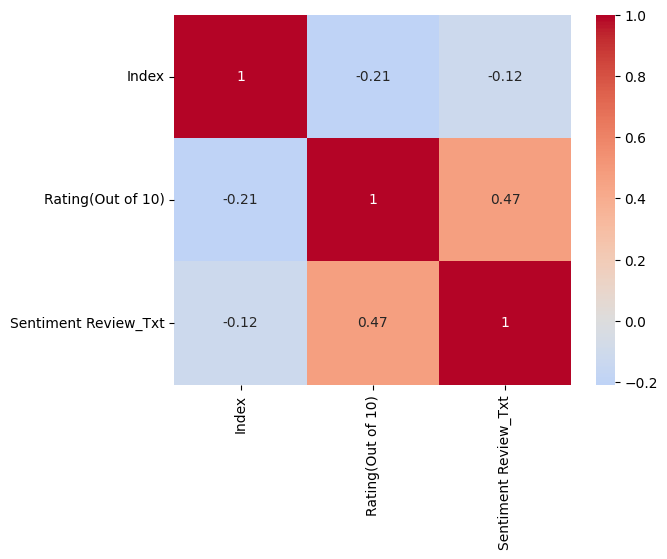

In [84]:
# Crear una matriz de correlación para el conjunto de datos
correlation_matrix = data_hotel.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

Como se puede observar, existe una correlación entre el sentimiento y la valoración de un hotel (0.47.)

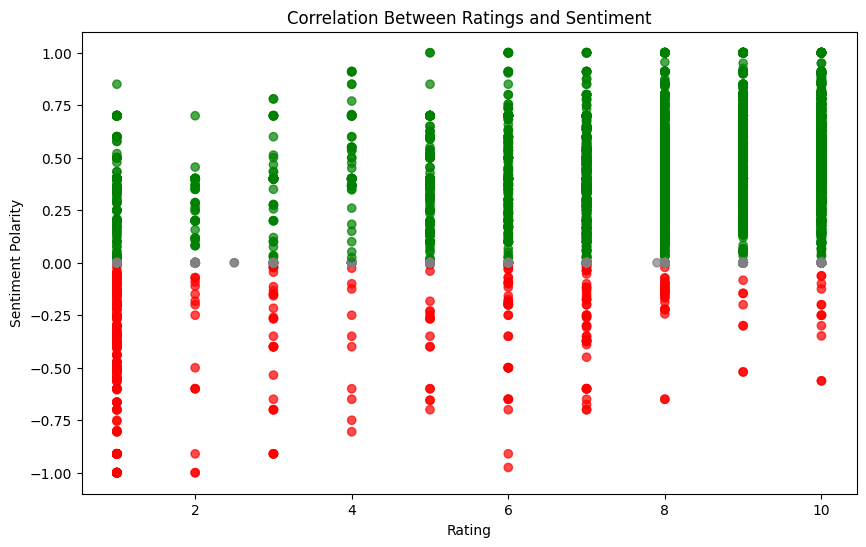

In [85]:
plt.figure(figsize=(10,6))
colors = data_hotel["Sentiment Review_Txt"].apply(lambda x: 'red' if x < 0 else 'gray' if x == 0 else 'green')
plt.scatter(data_hotel["Rating(Out of 10)"], data_hotel["Sentiment Review_Txt"], c=colors, alpha=0.7)
plt.title("Correlation Between Ratings and Sentiment")
plt.xlabel("Rating")
plt.ylabel("Sentiment Polarity")
plt.show()

Entre mejor puntuado esté un hotel, los sentimientos positivos aumentan y los sentimientos negativos en las reseñas bajan.

In [86]:
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

Ahora, importamos una serie de palabras auxiliares para eliminarlas y así identificar las palabras claves en una oración

In [87]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [88]:
def analyze_sentiment_nltk(text):
  analysis = TextBlob(str(text))
  return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

In [89]:
data_hotel["Sentiment Rating_att"] = data_hotel["Rating_attribute"].apply(analyze_sentiment_nltk)
data_hotel.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Sentiment Review_Txt,Sentiment Rating_att
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",48.33%,Positive
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,64.60%,Positive
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food.",0.00%,Positive
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",50.00%,Positive
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",35.36%,Positive


In [90]:
# Procedemos a obtener las palabras que representan sentimientos positivos y negativos
positive_reviews = ' '.join(data_hotel[data_hotel["Sentiment Rating_att"] == "Positive"]["Rating_attribute"])
negative_reviews = ' '.join(data_hotel[data_hotel["Sentiment Rating_att"] == "Negative"]["Rating_attribute"])
positive_reviews

"Best budget friendly hotel Amazing place Overall good stay. Economic. Lovely Great hotel Great staff and great staying Awesome hotel with good facility All the services was good wonderful and well maintained hotel Good on all aspects Great room, great sense of service Its good property. Rooms are spacious and clean. Staff are very cooperative Stay was nice. We, as seven member family enjoyed it. the staff was helpful, quick and responsive Very good Pleasant Good Very good Good Experience Very good Exceptional Very good Stay was good And comfortable. Good Superb Very good Very good Good Good Good room for good price Good to stay there Very good Very good Good Great value, good overall experience Well connected, close to the Railway station, and professional staff Superb wonderful We enjoyed the stay. Good Overall a comfortable stay, which could have been better with good TV and cable Superb Superb Superb My stay was very comfortable and enjoyable Ok Very good Good value of money Clean 

In [91]:
# Listado de palabras auxiliares en inglés
stopwords_set = set(stopwords.words("english"))

In [92]:
positive_tokens = word_tokenize(positive_reviews)
negative_tokens = word_tokenize(negative_reviews)

In [93]:
# Procedemos a filtrar las palabras de que nos interesan
positive_tokens = [word.lower() for word in positive_tokens if word.isalpha() and word.lower() not in stopwords_set]
negative_tokens = [word.lower() for word in negative_tokens if word.isalpha() and word.lower() not in stopwords_set]

In [94]:
# Obtenemos las palabras más comunes
top_positive_keywords = Counter(positive_tokens).most_common(5)
print("top 5 palabras positivas más comunes")
print(top_positive_keywords)
print()
top_negative_keywords = Counter(negative_tokens).most_common(5)
print("top 5 palabras negativas más comunes")
print(top_negative_keywords)

top 5 palabras positivas más comunes
[('good', 1894), ('exceptional', 779), ('superb', 691), ('stay', 599), ('pleasant', 353)]

top 5 palabras negativas más comunes
[('bad', 560), ('poor', 177), ('disappointing', 75), ('experience', 62), ('worst', 60)]


In [95]:
# Aquí agrupamos el sentimiento más común por hotel
hotel_sentiments = list()

for hotel in data_hotel["Name"].unique():
  hotel_df = data_hotel[data_hotel["Name"] == hotel]
  sentiments = list()
  for review_text in hotel_df["Review_Text"]:
    analysis = TextBlob(str(review_text))
    if analysis.sentiment.polarity > 0:
      sentiments.append("Positive")
    elif analysis.sentiment.polarity < 0:
      sentiments.append("Negative")
    else:
      sentiments.append("Neutral")
  if sentiments:
    overall_sentiment = max(set(sentiments), key=sentiments.count)
  else:
    overall_sentiment = "Neutral"

  hotel_sentiments.append({'Hotel':hotel, 'Sentiment':overall_sentiment})

hotel_sentiments_df = pd.concat([pd.DataFrame(item, index=[0]) for item in hotel_sentiments], ignore_index=True)
print(hotel_sentiments_df)

                                                            Hotel Sentiment
0                                                 Hotel The Pearl  Positive
1                                            Hotel Grand Park Inn  Positive
2                                  FabHotel White Klove Paharganj  Positive
3                            Hotel Mannat international by Mannat  Positive
4           Holiday Inn New Delhi Mayur Vihar Noida, an IHG Hotel  Positive
..                                                            ...       ...
565  Hotel SM SUITS Near Delhi Airport-Unit BY Grand urban Luxury  Positive
566                              OYO Flagship Hotel Olive Saffron  Positive
567                                     Flagship Chaudhary Palace  Positive
568                            Hotel Aman Continental - Paharganj  Positive
569                                    Hotel Pablas International  Positive

[570 rows x 2 columns]


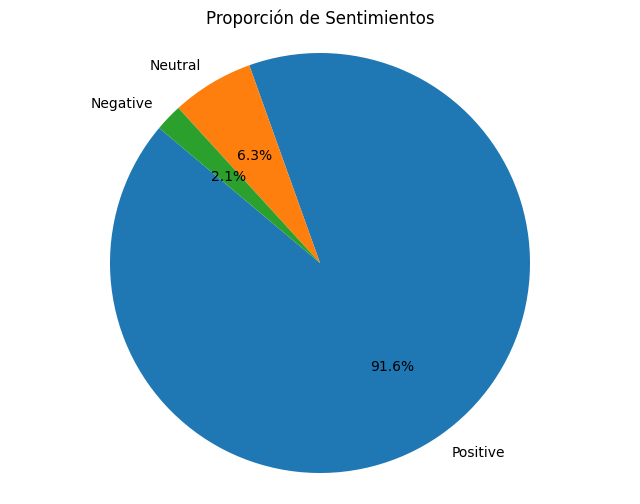

In [96]:
import matplotlib.pyplot as plt

conteo_sentimientos = hotel_sentiments_df['Sentiment'].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(conteo_sentimientos, labels=conteo_sentimientos.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Sentimientos')
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.show()

## NRCLex

In [97]:
!pip install NRCLex

In [98]:
from nrclex import NRCLex
data_hotel.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Sentiment Review_Txt,Sentiment Rating_att
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,900.00%,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..",48.33%,Positive
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,900.00%,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,64.60%,Positive
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,900.00%,"Location, Indian food.",0.00%,Positive
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,900.00%,"The location and the hotel itself is great. Next time I will stay here. Nice rooms with comfortable beds. good attitude of staff, they are helpful and explain you everything you ask them.",50.00%,Positive
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,900.00%,"Friendly and smiling staffs.. The reception staff are so excellent and ready to help me any time, location is fantastic near all the attractions, room was big and comfortable..",35.36%,Positive


In [99]:
# Limpiamos
data_hotel["Review_Text"] = data_hotel["Review_Text"].fillna("")
# Usamos NRCLex para detectar emociones
data_hotel["Emotion Review_Txt"] = data_hotel["Review_Text"].apply(lambda text: [(emotion, score * 100) for emotion, score in NRCLex(text).affect_frequencies.items()])

In [100]:
pd.set_option("display.max_colwidth", None)
pd.options.display.float_format = '{:.2%}'.format
data_hotel[["Review_Text", "Emotion Review_Txt"]].head(3)

,Review_Text,Emotion Review_Txt
0,"Hotel the pearl is perfect place to stay in Delhi Paharganj. whole staff are very helpful, informative. Rooms are clean and comfortable. The hotel's location was very convenient, and we had a truly wonderful stay.. Most recommended..","[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 26.666666666666668), (surprise, 6.666666666666667), (positive, 33.33333333333333), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 26.666666666666668), (anticipation, 6.666666666666667)]"
1,Location of the hotel is perfect. The hotel is peaceful and nice. The staff is very kind and nice rooms. I recommend this hotel..,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 28.57142857142857), (surprise, 7.142857142857142), (positive, 28.57142857142857), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 21.428571428571427), (anticipation, 14.285714285714285)]"
2,"Location, Indian food.","[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 33.33333333333333), (surprise, 0.0), (positive, 33.33333333333333), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 33.33333333333333)]"


En la columna "Emotion" se describe el porcentaje de distintas emociones encontradas en la reseña

In [101]:
pd.reset_option('all')

<ipython-input-101-056908e7e3ef>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-101-056908e7e3ef>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-101-056908e7e3ef>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


# **Analyzing Emotional Aspect of Tweets**

## NRCLex

In [102]:
data_tweets = pd.read_csv("/content/drive/MyDrive/Tweets.csv")
data_tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [103]:
data_tweets.shape

(27481, 4)

Dado que son muchos datos, escogeremos aleatoriamente 15

In [104]:
random_rows = data_tweets.sample(n=15, random_state=42)

In [105]:
def get_top_emotions(text):
  emotions = NRCLex(str(text))
  return emotions.top_emotions

In [106]:
random_rows["Emotion_analysis"] = random_rows["text"].apply(get_top_emotions)
pd.set_option("display.max_colwidth", None)
pd.options.display.float_format = '{:.2%}'.format

In [107]:
random_rows.head()

,textID,text,selected_text,sentiment,Emotion_analysis
1588,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at any point? lovelovelove<3,t? lovelovelove,positive,"[(anticipation, 1.0)]"
23879,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,neutral,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]"
6561,07d17131b1,"was in Palawan a couple of days ago, i`ll try to post pictures tom.","was in Palawan a couple of days ago, i`ll try to post pictures tom.",neutral,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]"
2602,2820205db5,I know! I`m so slow its horrible. DON`T TELL ON ME!,horrible.,negative,"[(fear, 0.25), (anger, 0.25), (negative, 0.25), (disgust, 0.25)]"
4003,7d3ce4363c,"Glad I went out, glad I didn`t leave early, and glad to be afterpartying it up @ Beth`s I`m back!",glad,positive,"[(positive, 0.2222222222222222), (joy, 0.2222222222222222), (anticipation, 0.2222222222222222)]"


## VADER

In [108]:
!pip install vaderSentiment

In [109]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def vader_sentiment(text):
  score = analyzer.polarity_scores(str(text))
  if score["compound"] >= 0.05:
    return "Positive"
  elif score["compound"] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

random_rows["VADER_analysis"] = random_rows["text"].apply(vader_sentiment)
random_rows.head()


,textID,text,selected_text,sentiment,Emotion_analysis,VADER_analysis
1588,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at any point? lovelovelove<3,t? lovelovelove,positive,"[(anticipation, 1.0)]",Neutral
23879,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,neutral,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]",Neutral
6561,07d17131b1,"was in Palawan a couple of days ago, i`ll try to post pictures tom.","was in Palawan a couple of days ago, i`ll try to post pictures tom.",neutral,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]",Neutral
2602,2820205db5,I know! I`m so slow its horrible. DON`T TELL ON ME!,horrible.,negative,"[(fear, 0.25), (anger, 0.25), (negative, 0.25), (disgust, 0.25)]",Negative
4003,7d3ce4363c,"Glad I went out, glad I didn`t leave early, and glad to be afterpartying it up @ Beth`s I`m back!",glad,positive,"[(positive, 0.2222222222222222), (joy, 0.2222222222222222), (anticipation, 0.2222222222222222)]",Positive


## BERT

In [110]:
pip install torch

In [111]:
pip install transformers

In [112]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.nn.functional import softmax

In [113]:
data_tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [114]:
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = BertForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [115]:
def predict_sentiment(text):
  encoded_input = tokenizer(str(text), return_tensors="pt")
  output = model(**encoded_input)
  logits = output.logits
  probs = softmax(logits, dim=1)
  predicted_label = probs.argmax(dim=1).item()
  sentiment_mapping = {0:"very negative", 1:"negative", 2:"neutral", 3:"positive", 4:"very positive"}
  predicted_sentiment = sentiment_mapping.get(predicted_label, 'unknown')
  return predicted_sentiment

In [116]:
def get_tweet_sentiment():
  tweet = input("Enter a tweet: ")
  sentiment = predict_sentiment(tweet)
  print(f"The sentiment of the tweet is: {sentiment}")

# get_tweet_sentiment()

## Multinomial Naive Bayes

In [117]:
pip install scikit-learn

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [119]:
data_tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative


In [120]:
data_tweets = data_tweets.dropna(subset=["text", "sentiment"])
train_data, test_data = train_test_split(data_tweets, test_size=0.2, random_state=42)

In [121]:
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(train_data["text"].astype(str), train_data["sentiment"])

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [122]:
def sentimentPrediction(tweet):
  predictedSentiment = modelo.predict([tweet])[0]
  return predictedSentiment

In [123]:
# user_input = input("Enter a tweet: ")
# sentiment = sentimentPrediction(user_input)
# print(f"The sentiment of the tweet is: {sentiment}")